# Introduction to Python 
# Homework #5
- Due Tuesday Oct 10 at 6pm
- This homework will be graded
- You MUST submit on CourseWorks2 before it closes
    - Verify your submission succeeded
    - Email submissions are not accepted 
    

# Academic Honesty
* The computer science department has strict polices. Check
the department [web page](http://www.cs.columbia.edu/education/honesty) for details. 
- Do not look at anybody else's source code. Do not show anybody
your source, or leave your source where somebody could see it.
You MUST write your own code.
- For this class, feel free to discuss issues with other people, but suggest waiting an hour or two after a discussion, before writing your code.
-  Cases of non original source will be refered to the Judical Committee.



# Problem 1, 2 & 3 
- Extract data directly from a zipfile without unpacking it
- use zipfile module [doc](https://docs.python.org/3.5/library/zipfile.html#zipfile.ZipInfo). 
- in part, this problem is an exercise in reading Python documentation
- only need to use three methods:
    - zipfile.ZipFile(path)
        - 'open' the zip file and read from it
        - like 'open', should use 'with' to manage it
    - zipfile.namelist()
        - returns list of the files in zip archive
    - zipfile.open()
        - opens a file in the zip for reading
        - use 'with'


# write 'phelp' class
- extract info from python's help documentation
- download 'python-docs.zip' from CourseWorks
- write four methods:
    - ```__init__()``` method should read in all the help files and save
them in the phelp object. remember to convert to unicode, and remove newline chars. think how to store the data to make it easy to write the
methods below
    - fileHits() method - print hits/file
    - totalHits() method - checks all file lines for match, and print hit count
    - grep() method - print file name, line number, and line of each match

- note that like the linux 'grep' command, multiple appearances of the search string in a single line is considered ONE hit - we are counting the lines that have a hit(s). 
- decode using 'utf-8'

In [97]:
import os
import zipfile

def test1(zpath):
    
    with zipfile.ZipFile(zpath) as zf:
        for fn in zf.namelist():
            
            if fn.endswith('.txt'):
                print (fn)

In [98]:
def test2(zpath):
    
    with zipfile.ZipFile(zpath) as zf:
        for fn in zf.namelist():
                
                if fn.endswith('gui.txt'):
                    
                    with zf.open(fn) as f:
                        lines = []
                        for l in f:
                            
                            lines.append(l.decode('utf-8').replace('\n',''))
                            
                        print (lines)

In [99]:
import os
import zipfile

class phelp:
  
    cachedfiles = {}
    
    def __init__(self, zpath):
        if not os.path.exists(zpath):
            raise FileNotFoundError('file ' + zpath + ' does not exist')
        if not zpath.endswith('.zip'):
            raise ValueError('file ' + zpath + ' is not a zip file')

        with zipfile.ZipFile(zpath) as zf:
            for fn in zf.namelist():
              
                if fn.endswith('.txt'):
                 
                    with zf.open(fn) as f:
                        lines = []
                        for l in f:
                           
                            lines.append(l.decode('utf-8').replace('\n',''))
                       
                        phelp.cachedfiles[fn] = lines
    
    def fileHits(self, hit):
        for fn, lines in phelp.cachedfiles.items():
            cnt = 0
            for l in lines:
                idx = l.find(hit)
                if idx != -1: cnt += 1
                    
            if cnt != 0:
                print ('{0} {1}'.format(cnt, fn))

    def totalHits(self, hit):
        cnt = 0
        for fn, lines in phelp.cachedfiles.items():
            for l in lines:
                idx = l.find(hit)
                if idx != -1: cnt += 1
       
            
        return cnt
    
    
    def grep(self, hit):
        for fn, lines in phelp.cachedfiles.items():
            ln = 0
            for l in lines:
                ln += 1
                idx = l.find(hit)
                if idx != -1: print ('{0}:{1}: {2}'.format(fn, ln, l))

In [101]:
# bad pathname

phelp('asdf')

FileNotFoundError: file asdf does not exist

In [100]:
# set to where ever you place the python docs zip file

zfile = 'python-docs.zip'

p = phelp(zfile)

In [101]:
p.fileHits('zipfiles')

1 python-3.6.3-docs-text/distutils/apiref.txt
3 python-3.6.3-docs-text/using/cmdline.txt
1 python-3.6.3-docs-text/whatsnew/3.2.txt
1 python-3.6.3-docs-text/library/warnings.txt
1 python-3.6.3-docs-text/reference/import.txt


In [102]:
[p.totalHits(w) for w in ['rpartition', 'linux','universal', 'mode', 'zipfile', 'zipfiles']]

[11, 42, 59, 1175, 103, 7]

In [103]:
p.grep('rpartition')

python-3.6.3-docs-text/whatsnew/2.7.txt:917: * The "split()", "replace()", "rindex()", "rpartition()", and
python-3.6.3-docs-text/whatsnew/2.5.txt:975:   "rpartition(sep)" methods that simplify a common use case.
python-3.6.3-docs-text/whatsnew/2.5.txt:984:   "rpartition(sep)" also returns a 3-tuple but starts searching from
python-3.6.3-docs-text/whatsnew/2.5.txt:995:      >>> 'www.python.org'.rpartition('.')
python-3.6.3-docs-text/whatsnew/2.5.txt:997:      >>> 'www.python.org'.rpartition(':')
python-3.6.3-docs-text/whatsnew/3.2.txt:2380:      extension = name.rpartition('.')[2]
python-3.6.3-docs-text/whatsnew/3.2.txt:2420:   also used by "rfind()", "rindex()", "rsplit()" and "rpartition()".
python-3.6.3-docs-text/library/importlib.txt:1434:            parent_name, _, child_name = absolute_name.rpartition('.')
python-3.6.3-docs-text/library/stdtypes.txt:1522: str.rpartition(sep)
python-3.6.3-docs-text/library/stdtypes.txt:2284: bytes.rpartition(sep)
python-3.6.3-docs-text/library/std

In [104]:
p.grep('zipfiles')

python-3.6.3-docs-text/distutils/apiref.txt:794: as tarballs or zipfiles.
python-3.6.3-docs-text/using/cmdline.txt:83:    and zipfiles that are passed to the interpreter as the script
python-3.6.3-docs-text/using/cmdline.txt:442:    may refer to zipfiles containing pure Python modules (in either
python-3.6.3-docs-text/using/cmdline.txt:444:    zipfiles.
python-3.6.3-docs-text/whatsnew/3.2.txt:1544: zipfiles, uncompressed tarfiles, gzipped tarfiles, and bzipped
python-3.6.3-docs-text/library/warnings.txt:328:    used to support displaying source for modules found in zipfiles or
python-3.6.3-docs-text/reference/import.txt:663: libraries) from zipfiles.


# put your phelp class in a script
- call your script 'phelp'. it should have three parts
    - define the command args you want to receive
    - call argparse - if it fails, it will terminate the script, otherwise, script execution will continue
- if the path for the zip file is invalid, return an exit value of 1
- not the most efficient command, as it re-reads the zip file each time it runs

In [26]:
# to save you a little grief, here's how you want to define
# your command line args to argparse
import argparse 
parser = argparse.ArgumentParser(description=phelp)

# required positional arg
parser.add_argument("search", type=str,
                    help="search string")


# optional arg
parser.add_argument("-t", "--totalhits", help="show total number of hits in all files",
			 action='store_true')

# optional arg
parser.add_argument("-g", "--grep", help="show matching hit lines",
			 action='store_true')

# optional arg
parser.add_argument("-f", "--filehits", help="show number of hits in files",
			 action='store_true')

# optional arg with required zippath value
parser.add_argument("-z", "--zippath", help="path of python zip file",
			 action='store')





_StoreAction(option_strings=['-z', '--zippath'], dest='zippath', nargs=None, const=None, default=None, type=None, choices=None, help='path of python zip file', metavar=None)

In [ ]:
```
# sample session


week5@larrys-MBP$ python phelp
usage: phelp [-h] [-t] [-g] [-f] [-z ZIPPATH] search
phelp: error: the following arguments are required: search
            
week5@larrys-MBP$ python phelp -h
usage: phelp [-h] [-t] [-g] [-f] [-z ZIPPATH] search

positional arguments:
  search                search string

optional arguments:
  -h, --help            show this help message and exit
  -t, --totalhits       show total number of hits in all files
  -g, --grep            show matching hit lines
  -f, --filehits        show number of hits in files
  -z ZIPPATH, --zippath ZIPPATH
                        path of python zip file
    
week5@larrys-MBP$ python phelp -f zipfiles
1 python-3.6.0-docs-text/library/warnings.txt
3 python-3.6.0-docs-text/using/cmdline.txt
1 python-3.6.0-docs-text/distutils/apiref.txt
1 python-3.6.0-docs-text/whatsnew/3.2.txt
1 python-3.6.0-docs-text/reference/import.txt

week5@larrys-MBP$ python phelp -t zipfiles
7

week5@larrys-MBP$ python phelp -g zipfiles
python-3.6.0-docs-text/whatsnew/3.2.txt:1545: zipfiles, uncompressed tarfiles, gzipped tarfiles, and bzipped
python-3.6.0-docs-text/distutils/apiref.txt:794: as tarballs or zipfiles.
python-3.6.0-docs-text/library/warnings.txt:328: used to support displaying source for modules found in zipfiles or
python-3.6.0-docs-text/reference/import.txt:662: libraries) from zipfiles.
python-3.6.0-docs-text/using/cmdline.txt:83: and zipfiles that are passed to the interpreter as the script
python-3.6.0-docs-text/using/cmdline.txt:442: may refer to zipfiles containing pure Python modules (in either
python-3.6.0-docs-text/using/cmdline.txt:444: zipfiles.
                                                                                                    week5@larrys-MBP$ phelp -t zipfiles -z badzippath

week5@larrys-MBP$ python phelp -t zipfiles -z badzippath
file badzippath does not exist
week5@larrys-MBP$ echo $?
1
                                                                                                    
week5@larrys-MBP$ python phelp -t zipfiles -z python-docs.zip 
7
week5@larrys-MBP$ echo $?
0
                                                                                                    
                                                                                                    
```

# Problem 4
## Plot Bessel Functions
- plot 'j0' bessel function 
    - [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.j0.html#scipy.special.j0)
- use 'jn_zeros' to find the zeros(where function plot crosses x axis) of 'j0' 
    - [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jn_zeros.html#scipy.special.jn_zeros)
    - first arg must be 0
- start the plot at x = 0 on the left
- go as far right as needed to display the requested number of zeros
- for a smooth plot, evaluate j0 at .1 increments(x = .0, .1, .2,...)
    - can use np.arange to generate the x values
    - [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)
- return the list of j0 zeros
- use matplotlib
    - your plot title, x & y labels, should be the same as mine


In [74]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import math

# make plots render in the notebook
%matplotlib inline

# values of j0
[scipy.special.j0(1), scipy.special.j0(2)]

[0.76519768655796649, 0.22389077914123562]

In [75]:
# note j0() takes lists...

scipy.special.j0([0,1])

array([ 1.        ,  0.76519769])

In [91]:
# ...and arrays as args 
# returns an array of the evaluations

scipy.special.j0(np.array([0,1]))

array([ 1.        ,  0.76519769])

In [77]:
# first arg to jn_zeros must be 0

# first three zeros of j0

scipy.special.jn_zeros(0, 3)


array([ 2.40482556,  5.52007811,  8.65372791])

In [78]:
# check the zeros

scipy.special.j0(scipy.special.jn_zeros(0, 3))

array([ -9.58688255e-17,  -1.64951298e-17,  -8.70443181e-17])

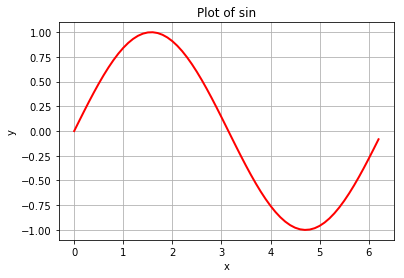

In [79]:
# this will plot a numpy vector function

def plotf(func, low, high):
    # arg is a vector function to plot
    # make a set of x vals
    x = np.arange(low, high, .1)
    # eval the func on the x vals
    y = func(x)
    plt.plot(x, y, 'r', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.title('Plot of sin')
    
plotf(np.sin, 0, 2*math.pi)

In [95]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import math

def bessel(n):
    scipy.special.j0(np.array([0, 2*math.pi,0.1]))
    scipy.special.jn_zeros(0,n)
    np.arange(0, 2*math.pi,0.1, dtype=None)

    
bessel(2)

array([ 2.40482556,  5.52007811])

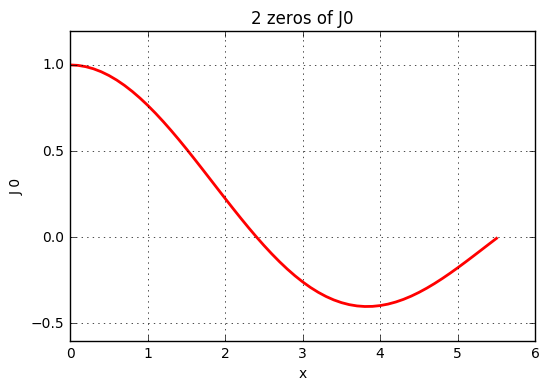

In [74]:
bessel(2)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444,  14.93091771])

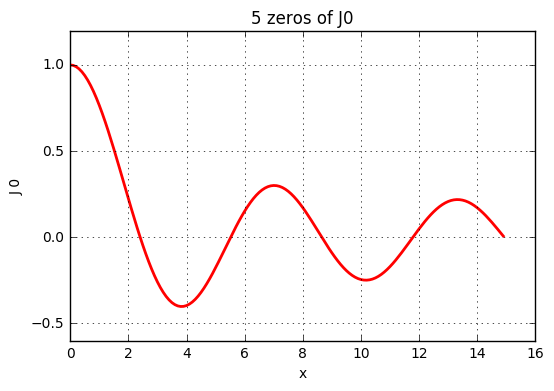

In [61]:
bessel(5)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444,
        14.93091771,  18.07106397,  21.21163663,  24.35247153,
        27.49347913,  30.63460647])

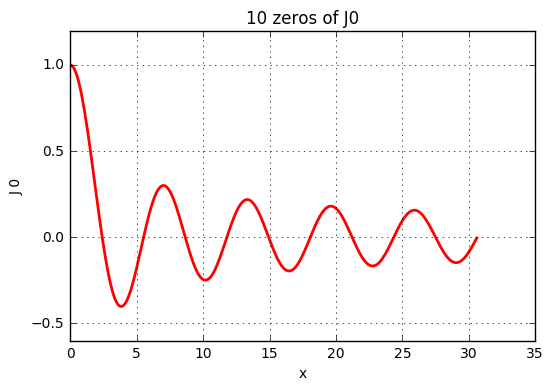

In [62]:
bessel(10)

# Problem 5
## intervals in files
- implement a class 'Interval', that does 'interval arithmetic'
- an interval consists of a min and max value. use instance variable names 'imin', 'imax' to avoid confusion with 'min' and 'max' functions
- define five 'object methods'
    - define ```__init__(self, imin, imax)``` - define instance variables
    - define ```__str__(self)``` to print the object like this: ```Interval<self.imin, self.imax>```
    - define ```__repr__(self)``` to call ```__str__```
    - define ```__eq__(self, arg)``` - this is a predicate that returns True if 
self and the arg are both intervals, and they have the same imin and imax values. it is called by the '==' operator
    - define ```__add__(self, iv)``` - let 'i' and 'i2' be intervals.  ```i + i2 represents a new interval, where the new imin and imax is the min and max of (x + x2), where i.imin <= x <= i.imax and i2.imin <= x2 <= i2.imax```. return the sum as a new Interval
    - define dump(self, path) method. it will pickle dump the interval to the named file
- define two 'class methods' (no self arg)
    - load(path) - pickle loads the saved Interval object, and returns it. this is a good example of the need for a class method - there is no object to put this method on
    - addPaths(path1, path2) - pickle load the saved Intervals in files path1 and path2, and return an Interval of their sum
- don't worry about catching errors. 

In [29]:
import pickle
import tempfile

# does not create the file, just makes a pathname
tmp2, tmp3 = [tempfile.NamedTemporaryFile().name for j in range(2)]

In [96]:
class Interval:
    def __init__(self, imin, imax):
        imin= min() 
        imax= max()
    def __str__(self)
        print ('Interval<'self.imin, self.imax'>')
    def __repr__(self)
        print(__str__)
    def __eq__(self, arg)
        if imin==imax True:
            return self            
        
    def __add__(self, iv)
        new_interval_sum=i + i2
        imin_new= min(x+x2)
        imax_new=max(x+x2)
        i.imin <= x <= i.imax 
        i2.imin <= x2 <= i2.imax
        return new_interval_sum
    def dump(self, path) method
        with open(path, 'br') as f:
            root2 = pickle.load(f)

SyntaxError: invalid syntax (<ipython-input-96-48a02aa0dcb2>, line 5)

In [98]:
i = Interval(-1,6)
i2 = Interval(5, 13)
i3 = Interval(10,10)

i, i2, i3

(Interval<-1, 6>, Interval<5, 13>, Interval<10, 10>)

In [76]:
# turns into 
# i.__add__(i2)

i + i2

Interval<4, 19>

In [77]:
i2 + i3

Interval<15, 23>

In [78]:
i2.dump(tmp2)
i3.dump(tmp3)


In [79]:
newi2 = Interval.load(tmp2)
newi2

Interval<5, 13>

In [80]:
Interval.addPaths(tmp2, tmp3)

Interval<15, 23>

In [81]:
i2 is newi2

False

In [82]:
# below translates into 
# i2.__eq__(newi2) 
# i2 and newi2 have the same imin, imax values, so == is True

i2 == newi2

True

In [83]:
# different imin, imax values, so False

i2 == i3

False